# Probability Refresher - Exercise 01

In the english language, there are $27$ possible letters a-z and the space - character. You are given a collection of $N$ English language documents, for each document, you have to:
* Calculate and plot the probability distribution $P(x)$ over the 27 letters $x$.
* Calculate and plot the probability distribution $P(x, y)$ over the $27 \times 27$ possible (ordered) di-grams $xy$. Note: For this joint distribution, its two marginals, $P(x)$ and $P(y)$, are identical.
* From this joint distribution, calculate and plot the conditional distributions $i)\ P(y|x)$, the conditional distribution of the second letter $y$ given the first letter $x$; and $ii)\ P(x|y)$, the conditional distribution of the first letter $x$ given the second letter $y$
* Calculate and plot the Shannon information content $h(x) = \log_2(1/P(x))$ of an outcome $x$ and the entropy of a randomly selected letter $H(x) = \sum\limits_x P(x)\log_2(1/P(x))$, assuming its probability is given by $P(x)$. Entropy is additive for independent random variables $(H(X,Y) = H(X) + H(Y))$ iff $P(x,y) = P(x)P(y))$, is this true for the document?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import math

In [2]:
def read_doc(document):
    with open(document, 'r') as f:
        lines = f.readlines()
        return lines

In [3]:
import itertools

alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
            'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 
            's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']

di_alphabet = [x[0]+x[1] for x in itertools.product(alphabet, alphabet)]

alphabet_mapping = dict([(letter, i) for i, letter in enumerate(alphabet)])

def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('black')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    plt.xticks([x for x in range(len(alphabet))], alphabet)
    plt.yticks([x for x in range(len(alphabet))], alphabet)

    if type(matrix[0]) == np.ndarray:
        for (x, y), w in np.ndenumerate(matrix):
            color = 'white' if w > 0 else 'black'
            size = np.sqrt(np.abs(w) / max_weight)
            rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                                 facecolor=color, edgecolor=color)
            ax.add_patch(rect)
    else:
        for x, w in np.ndenumerate(matrix):
            color = 'white' if w > 0 else 'black'
            size = np.sqrt(np.abs(w) / max_weight)
            rect = plt.Rectangle([x - size / 2, x - size / 2], size, size,
                                 facecolor=color, edgecolor=color)
            ax.add_patch(rect)

    ax.autoscale_view()
    #ax.invert_yaxis()

In [4]:
def compute_probabilities_unigrams(documents):
    probabilities = [0 for letter in alphabet]
    lines = []
    for document in documents:
        lines += read_doc(document)
    
    total = 0
    for line in lines:
        for char in line.replace("\n",""):
            if char.lower() in alphabet:
                total += 1
                probabilities[alphabet_mapping[char.lower()]] += 1
    
    output = np.array([el/total for el in probabilities])
    hinton(output)
    
    return probabilities, output
        
def compute_probabilities_digrams(documents):
    lines = []
    for document in documents:
        lines += read_doc(document)
        
    probabilities = [[0 for l in alphabet] for l2 in alphabet]
    
    for line in lines:
        for i, _ in enumerate(line[:-1].replace("\n", '')):
            if line[i]+line[i+1] in di_alphabet:
                probabilities[alphabet_mapping[line[i]]][alphabet_mapping[line[i+1]]] += 1
    total = 0
    for line in probabilities:
        total += sum(line)
        
    output = np.array([[el/total for el in line] for line in probabilities])
    
    hinton(output)
    
    return probabilities, output

def compute_probabilities_conditional(documents, frequencies, axis=0):
    probabilities = []
    for letter in alphabet:
        if axis==0:
            col = [x for x in frequencies[alphabet_mapping[letter]]]
        else:
            col = [x[alphabet_mapping[letter]] for x in frequencies]
        
        total = sum(col)
        probabilities.append([x/total for x in col])
    
    output = np.array(probabilities)
    
    hinton(output)
    
def compute_shannon_info_content(probabilities):
    output = np.array([math.log2(1/prob) for prob in probabilities])
    hinton(output)
    return output
            
def compute_entropy(probabilities,shannon_info):
    entropy = sum([prob*info for prob, info in zip(probabilities, shannon_info)])
    print(entropy)


4.09385564201


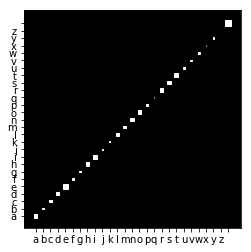

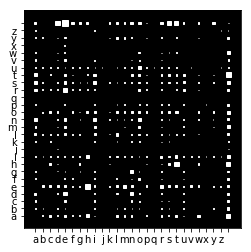

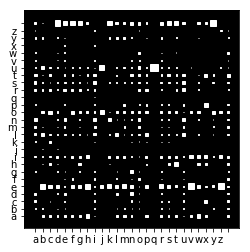

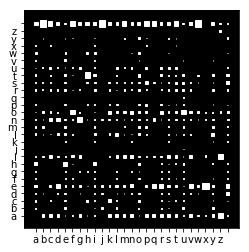

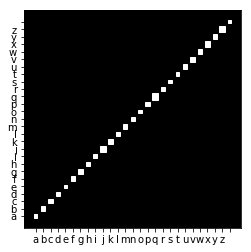

In [5]:
with PdfPages('multipage.pdf') as pdf:
    plt.figure(0)
    frequencies_uni, probabilities_uni = compute_probabilities_unigrams(['./txts/LIFE_by_JM_Machado_de_Assis.txt',
                                    './txts/THE_ATTENDANT_S_CONFESSION_by_JM_Machado_de_Assis.txt',
                                    './txts/THE_FORTUNE_TELLER_by_JM_Machado_de_Assis.txt'])
    plt.savefig(pdf, format='pdf')
    plt.figure(1)
    frequencies_di, probabilities_di = compute_probabilities_digrams(['./txts/LIFE_by_JM_Machado_de_Assis.txt',
                                    './txts/THE_ATTENDANT_S_CONFESSION_by_JM_Machado_de_Assis.txt',
                                    './txts/THE_FORTUNE_TELLER_by_JM_Machado_de_Assis.txt'])
    plt.savefig(pdf, format='pdf')

    plt.figure(2)
    compute_probabilities_conditional(['./txts/LIFE_by_JM_Machado_de_Assis.txt',
                                    './txts/THE_ATTENDANT_S_CONFESSION_by_JM_Machado_de_Assis.txt',
                                    './txts/THE_FORTUNE_TELLER_by_JM_Machado_de_Assis.txt'], 
                                    frequencies_di, axis=0)
    plt.savefig(pdf, format='pdf')

    plt.figure(3)
    compute_probabilities_conditional(['./txts/LIFE_by_JM_Machado_de_Assis.txt',
                                    './txts/THE_ATTENDANT_S_CONFESSION_by_JM_Machado_de_Assis.txt',
                                    './txts/THE_FORTUNE_TELLER_by_JM_Machado_de_Assis.txt'], 
                                    frequencies_di, axis=1)
    plt.savefig(pdf, format='pdf')

    plt.figure(4)
    shannon_info = compute_shannon_info_content(probabilities_uni)
    plt.savefig(pdf, format='pdf')

    compute_entropy(probabilities_uni, shannon_info)

    plt.show()
